In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw08.ipynb")

/home/codespace/.local/lib/python3.12/site-packages/nbformat/__init__.py:96: MissingIDFieldWarning: Cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)


# Homework 8: Confidence Intervals

**Helpful Resource:**

- [Python Reference](http://data8.org/su24/reference/): Cheat sheet of helpful array & table methods used in Data 8!

**Recommended Reading**: 

* [Estimation](https://www.inferentialthinking.com/chapters/13/Estimation)

In [2]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *

# These lines do some fancy plotting magic.",
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

## 1. Thai Restaurants in Berkeley

Jonathan and Bing are trying to see what the best Thai restaurant in Berkeley is. They survey 1,500 UC Berkeley students selected uniformly at random and ask each student which Thai restaurant is the best. (*Note: This data is fabricated for the purposes of this homework.*) The choices of Thai restaurants are [Lucky House](https://www.google.com/maps/place/Lucky+House+Thai+Cuisine/@37.8707428,-122.270045,15.32z/data=!4m5!3m4!1s0x80857e9e69a8c921:0x7b6d80f58406fb26!8m2!3d37.8721393!4d-122.2672699), [Imm Thai](https://www.google.com/maps/place/Imm+Thai+Street+Food/@37.8704926,-122.2687372,15.51z/data=!4m5!3m4!1s0x80857e9eec4f1e63:0x5f54d96f0dccdb72!8m2!3d37.8719079!4d-122.2691186), [Thai Temple](https://www.google.com/maps/place/Wat+Mongkolratanaram/@37.8689514,-122.2698649,14.75z/data=!4m5!3m4!1s0x80857e886e39daf1:0xe309caa1b5710fc0!8m2!3d37.8563633!4d-122.2707584), and [Thai Basil](https://www.google.com/maps/place/Thai+Basil/@37.8691911,-122.266539,15.37z/data=!4m5!3m4!1s0x80857c2f6ae0e2f1:0x6978b6e8a72d58d4!8m2!3d37.868327!4d-122.258081). After compiling the results, Jonathan and Bing release the following percentages of votes that each restaurant received, from their sample:

|Thai Restaurant  | Percentage|
|:------------:|:------------:|
|Lucky House | 8% |
|Imm Thai | 53% |
|Thai Temple | 25% |
|Thai Basil | 14% |

These percentages represent a uniform random sample of the population of UC Berkeley students. We will attempt to estimate the corresponding *parameters*, or the percentage of the votes that each restaurant will receive from the population (i.e. all UC Berkeley students). We will use confidence intervals to compute a range of values that reflects the uncertainty of our estimates.

The table `votes` contains the results of Jonathan and Bing's survey.

In [3]:
# Just run this cell
votes = Table.read_table('votes.csv')
votes

Vote
Lucky House
Lucky House
Lucky House
Lucky House
Lucky House
Lucky House
Lucky House
Lucky House
Lucky House
Lucky House


**Question 1.1.** Complete the function `one_resampled_percentage` below. It should return Imm Thai's ***percentage*** of votes after taking the original table (`tbl`) and performing one bootstrap sample of it. Remember that a percentage is between 0 and 100.

*Note 1:* `tbl` will always be in the same format as `votes`.

*Note 2:* This function should be completed **without** `.group` or `.pivot`. Using these functions will cause your code to timeout.

*Hint:* Given a table of votes, how can you figure out what percentage of the votes are for a certain restaurant? **Be sure to use percentages, not proportions, for this question!**


In [25]:
def one_resampled_percentage(tbl):
    bootstrap_sample = tbl.sample()
    imm_votes = bootstrap_sample.where('Vote', are.containing('Imm Thai'))
    imm_votes_len = len(imm_votes.column('Vote'))
    imm_percentage = imm_votes_len / bootstrap_sample.num_rows *100
    return imm_percentage

one_resampled_percentage(votes)

53.86666666666666

In [26]:
grader.check("q1_1")

q1_1 results: All test cases passed!

**Question 1.2.** Complete the `percentages_in_resamples` function such that it simulates and returns an array of **2023 elements**, where each element represents a bootstrapped estimate of the percentage of voters who will vote for Imm Thai. You should use the `one_resampled_percentage` function you wrote above.

_Note:_ We perform our simulation with **only 2023 trials** in this problem to reduce the runtime, but we should generally use more repetitions.


In [29]:
def percentages_in_resamples():
    percentage_imm = make_array()
    for amount in range(2023):
        percentage_imm = np.append(percentage_imm, one_resampled_percentage(votes))
    return percentage_imm

In [30]:
grader.check("q1_2")

q1_2 results: All test cases passed!

In the following cell, we run the function you just defined, `percentages_in_resamples`, and create a histogram of the calculated statistic for the 2023 bootstrap estimates of the percentage of voters who voted for Imm Thai. 

*Note:* This might take a few seconds to run.

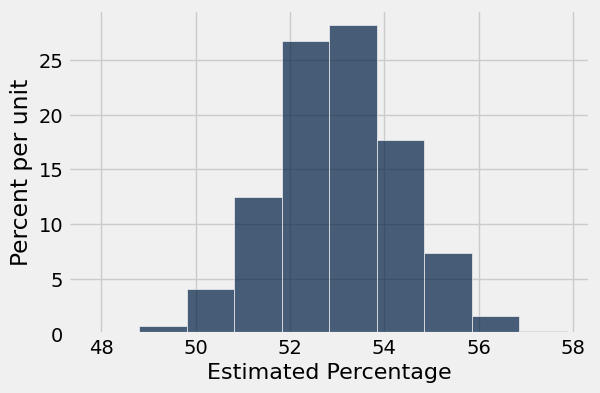

In [31]:
resampled_percentages = percentages_in_resamples()
Table().with_column('Estimated Percentage', resampled_percentages).hist("Estimated Percentage")

**Question 1.3.** Using the array `resampled_percentages`, find the values at the two edges of the middle 95% of the bootstrapped percentage estimates. Compute the lower and upper ends of the interval, named `imm_lower_bound` and `imm_upper_bound` respectively.

*Hint:* If you are stuck on this question, try looking over [Chapter 13.1](https://inferentialthinking.com/chapters/13/1/Percentiles.html) of the textbook.


In [ ]:
imm_lower_bound = percentile(2.5, resampled_percentages)
imm_upper_bound = percentile(97.5, resampled_percentages)
print(f"Bootstrapped 95% confidence interval for the percentage of Imm Thai voters in the population: [{imm_lower_bound:.2f}, {imm_upper_bound:.2f}]")

Bootstrapped 95% confidence interval for the percentage of Imm Thai voters in the population: [50.60, 55.53]


In [35]:
grader.check("q1_3")

q1_3 results: All test cases passed!

**Question 1.4.** The survey results seem to indicate that Imm Thai is beating all the other Thai restaurants among the voters. We would like to use confidence intervals to determine a range of likely values for Imm Thai's true lead over all the other restaurants combined. The calculation for Imm Thai's lead over Lucky House, Thai Temple, and Thai Basil combined is:

$$\text{Imm Thai's percent of vote} - (\text{100 percent} - \text{Imm Thai's percent of Vote})$$

Define the function `one_resampled_difference` that returns **exactly one value** of Imm Thai's percentage lead over Lucky House, Thai Temple, and Thai Basil combined from one bootstrap sample of `tbl`.

*Hint 1:* Imm Thai's lead can be negative.

*Hint 2:* Given a table of votes, how can you figure out what percentage of the votes are for a certain restaurant? **Be sure to use percentages, not proportions, for this question!**

*Note:* If the skeleton code provided within the function is not helpful for you, feel free to approach the question using your own variables.


In [62]:
def one_resampled_difference(tbl):
    bootstrap_all = tbl.sample()
    imm_votes = bootstrap_all.where('Vote', are.containing('Imm Thai'))
    imm_percentage = len(imm_votes.column('Vote')) / bootstrap_all.num_rows * 100
    other_restaurants_percentage = (100 - imm_percentage)
    return imm_percentage - other_restaurants_percentage 

In [63]:
grader.check("q1_4")

q1_4 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 1.5.** Write a function called `leads_in_resamples` that returns an array of 2023 elements representing the bootstrapped estimates (the result of calling `one_resampled_difference`) of Imm Thai's lead over Lucky House, Thai Temple, and Thai Basil combined. Afterwards, run the cell to plot a histogram of the resulting samples.

*Hint:* If you see an error involving `NoneType`, consider what components a function needs to have!


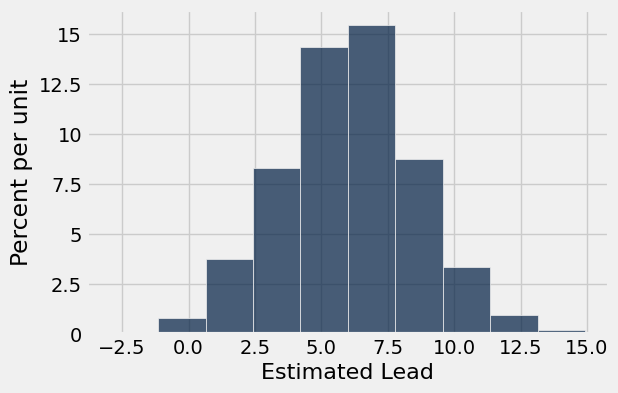

In [65]:
def leads_in_resamples():
    sampled_leads = make_array()
    for i in range(2023):
        sampled_leads = np.append(sampled_leads, one_resampled_difference(votes))
    return sampled_leads

sampled_leads = leads_in_resamples()
Table().with_column('Estimated Lead', sampled_leads).hist("Estimated Lead")

<!-- END QUESTION -->

**Question 1.6.** Use the simulated data in `sampled_leads` from Question 1.5 to compute an approximate 95% confidence interval for Imm Thai's true lead over Lucky House, Thai Temple, and Thai Basil combined.


In [ ]:
diff_lower_bound = ...
diff_upper_bound = ...
print("Bootstrapped 95% confidence interval for Imm Thai's true lead over Lucky House, Thai Temple, and Thai Basil combined: [{:f}%, {:f}%]".format(diff_lower_bound, diff_upper_bound))

In [ ]:
grader.check("q1_6")

## 2. Interpreting Confidence Intervals 

Jonathan computed the following 95% confidence interval for the percentage of Imm Thai voters: 

$$[50.53, 55.53]$$

(Your answer from 1.3 may have been a bit different due to randomness; that doesn't mean it was wrong!)

<!-- BEGIN QUESTION -->

**Question 2.1.** Jonathan also created 70%, 90%, and 99% confidence intervals from the same sample, but he forgot to label which confidence interval represented which percentages! ***First***, **match each confidence level (70%, 90%, 99%) with its corresponding interval in the cell below** (e.g. __ % CI: [52.1, 54] $\rightarrow$ replace the blank with one of the three confidence levels). ***Then***, **explain your thought process** and how you came up with your answers.

The intervals are below:

* [50.03, 55.94]
* [52.1, 54]
* [50.97, 54.99]

*Hint:* If you are stuck on this question, try looking over Chapters [13.3](https://inferentialthinking.com/chapters/13/3/Confidence_Intervals.html) and [13.4](https://inferentialthinking.com/chapters/13/4/Using_Confidence_Intervals.html) of the textbook.


_Type your answer here, replacing this text._

<!-- END QUESTION -->

**Question 2.2.** Suppose we produced **6,000 new samples** (each one a new/distinct uniform random sample of 1,500 students) from the population and **created a 95% confidence interval from each one**. **Roughly how many of those 6,000 intervals do you expect will actually contain the true percentage of the population?**

Assign your answer to `true_percentage_intervals`.


In [ ]:
true_percentage_intervals = ...

In [ ]:
grader.check("q2_2")

Recall the second bootstrap confidence interval you created, which estimated Imm Thai's lead over Lucky House, Thai Temple, and Thai Basil combined. Among
voters in the sample, Imm Thai's lead was 6%. Jonathan's 95% confidence interval for the true lead (in the population of all voters) was:

$$[1.2, 11.2]$$

Suppose we are interested in testing a simple yes-or-no question:

> "Is the percentage of votes for Imm Thai equal to the percentage of votes for Lucky House, Thai Temple, and Thai Basil combined?"

Our null hypothesis is that the percentages are equal, or equivalently, that Imm Thai's lead is exactly 0. Our alternative hypothesis is that Imm Thai's lead is not equal to 0.  In the questions below, don't compute any confidence interval yourself—use only Jonathan's 95% confidence interval.

> Hint: Try thinking about the width of the 95% confidence interval in comparison to the new confidence intervals in the questions below. **Drawing a picture may help.**

**Question 2.3.** Say we use a 5% p-value cutoff. Do we reject the null, fail to reject the null, or are we unable to tell using Jonathan's confidence interval?

Assign `cutoff_five_percent` to the number corresponding to the correct answer.

1. Reject the null / Data is consistent with the alternative hypothesis
2. Fail to reject the null / Data is consistent with the null hypothesis
3. Unable to tell using Jonathan's confidence interval

*Hint:* Consider the relationship between the p-value cutoff and confidence. If you're confused, take a look at [this chapter](https://inferentialthinking.com/chapters/13/4/Using_Confidence_Intervals.html) of the textbook.


In [ ]:
cutoff_five_percent = ...

In [ ]:
grader.check("q2_3")

**Question 2.4.** What if, instead, we use a p-value cutoff of 1%? Do we reject the null, fail to reject the null, or are we unable to tell using Jonathan's confidence interval?

Assign `cutoff_one_percent` to the number corresponding to the correct answer.

1. Reject the null / Data is consistent with the alternative hypothesis
2. Fail to reject the null / Data is consistent with the null hypothesis
3. Unable to tell using Jonathan's confidence interval


In [ ]:
cutoff_one_percent = ...

In [ ]:
grader.check("q2_4")

**Question 2.5.** What if we use a p-value cutoff of 10%? Do we reject, fail to reject, or are we unable to tell using our confidence interval?

Assign `cutoff_ten_percent` to the number corresponding to the correct answer.

1. Reject the null / Data is consistent with the alternative hypothesis
2. Fail to reject the null / Data is consistent with the null hypothesis
3. Unable to tell using Jonathan's confidence interval


In [ ]:
cutoff_ten_percent = ...

In [ ]:
grader.check("q2_5")